In [ ]:
IDEA : 

In [ ]:
PROJECT 3 PROPOSAL LEVEL 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

df = pd.read_csv('creditcard.csv')

In [2]:
print("Dataset Info:")
print(df.info())
print("\nClass Distribution:")
print(df['Class'].value_counts(normalize=True))

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

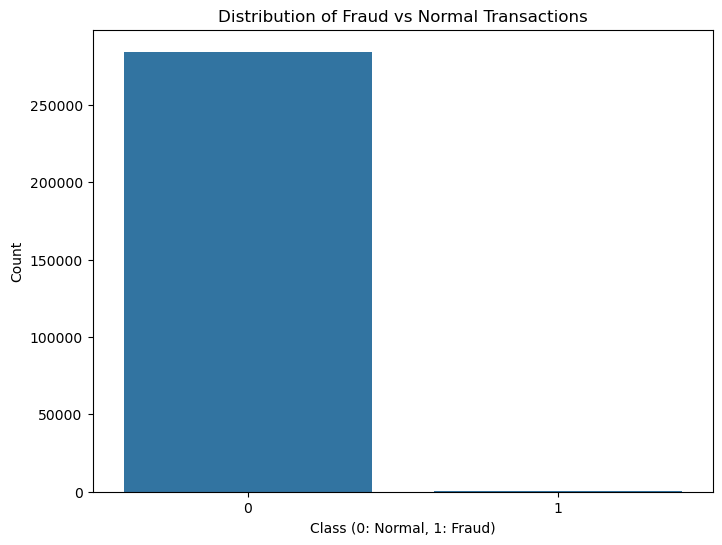

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraud vs Normal Transactions')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.show()

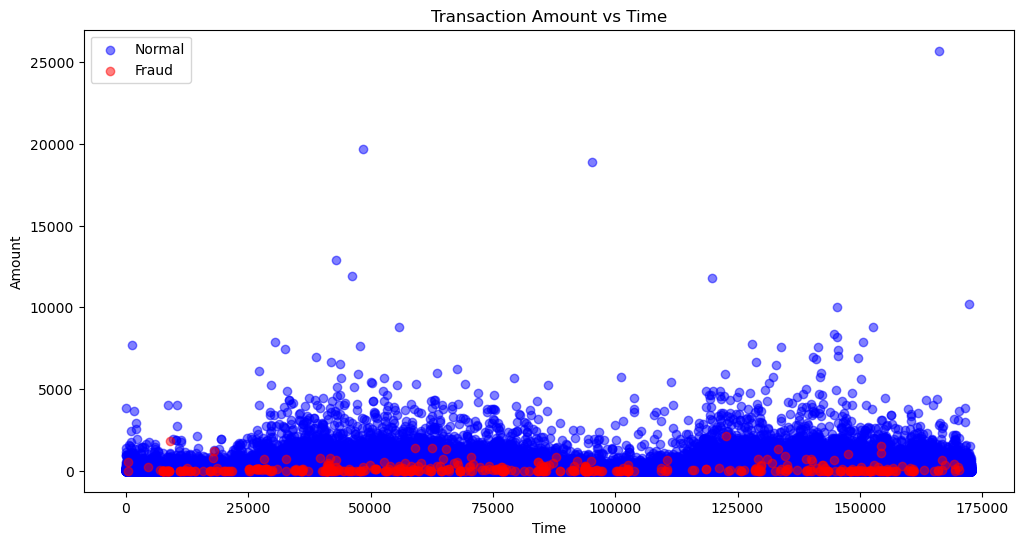

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount'], alpha=0.5, label='Normal', c='blue')
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount'], alpha=0.5, label='Fraud', c='red')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Transaction Amount vs Time')
plt.legend()
plt.show()

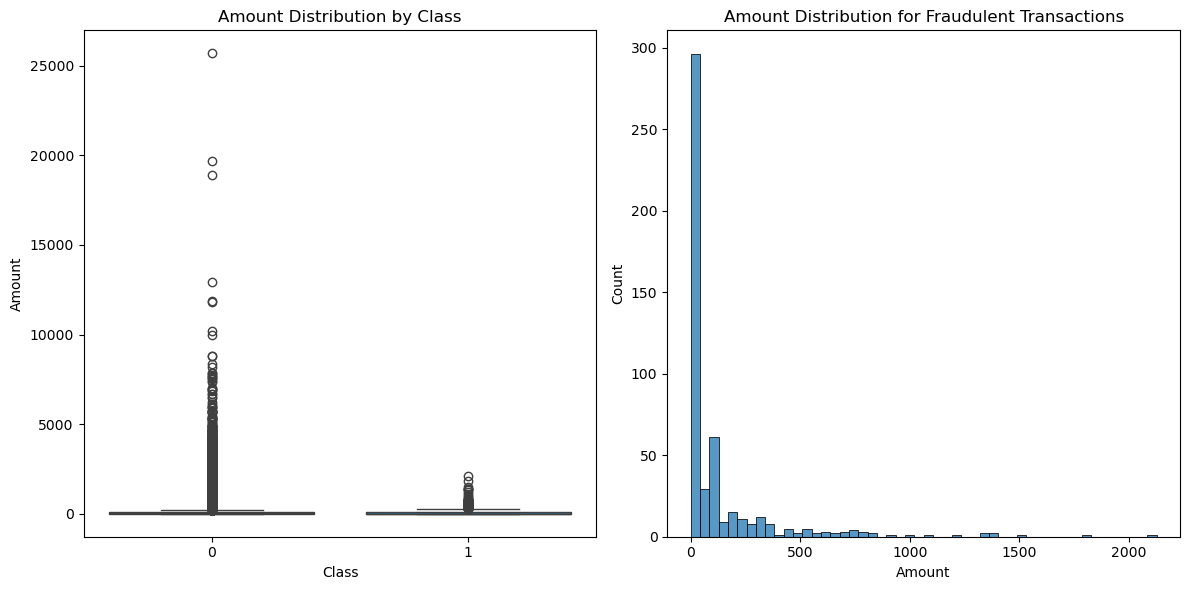

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['Class'] == 1], x='Amount', bins=50)
plt.title('Amount Distribution for Fraudulent Transactions')
plt.tight_layout()
plt.show()

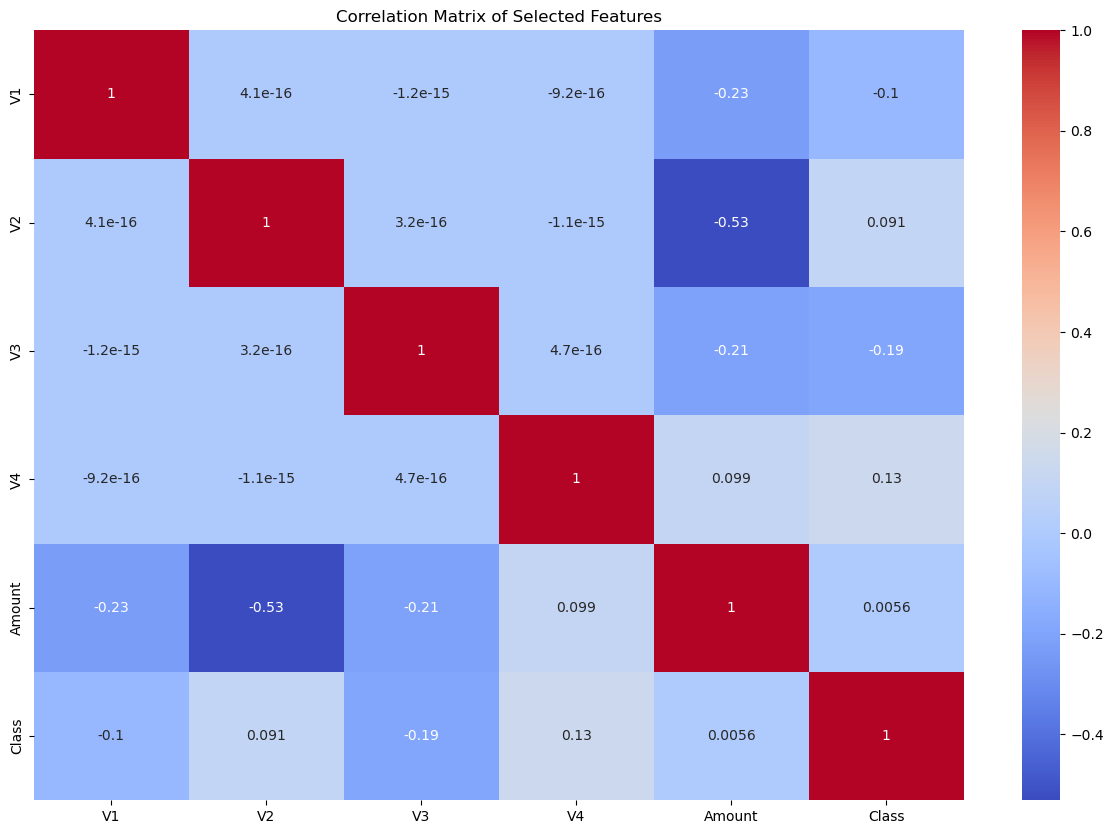

In [6]:
plt.figure(figsize=(15, 10))
selected_features = ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [7]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
smote = SMOTE(random_state=42)
lr_pipeline = Pipeline([('scaler', StandardScaler()),('classifier', LogisticRegression(random_state=42, max_iter=1000))])
rf_pipeline = Pipeline([('scaler', StandardScaler()),('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
dt_pipeline = Pipeline([('scaler', StandardScaler()),('classifier', DecisionTreeClassifier(random_state=42))])

In [9]:
models = {'Logistic Regression': lr_pipeline,'Random Forest': rf_pipeline,'Decision Tree': dt_pipeline}
results = {}

In [10]:
for name, model in models.items():
    print(f"\nTraining {name}...")
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    results[name] = {'predictions': y_pred,'probabilities': y_pred_proba,'confusion_matrix': confusion_matrix(y_test, y_pred),
                     'classification_report': classification_report(y_test, y_pred)}
    print(f"\n{name} Results:")
    print("\nClassification Report:")
    print(results[name]['classification_report'])


Training Logistic Regression...

Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962


Training Random Forest...

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962


Training Decision Tree...

Decision Tree Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864


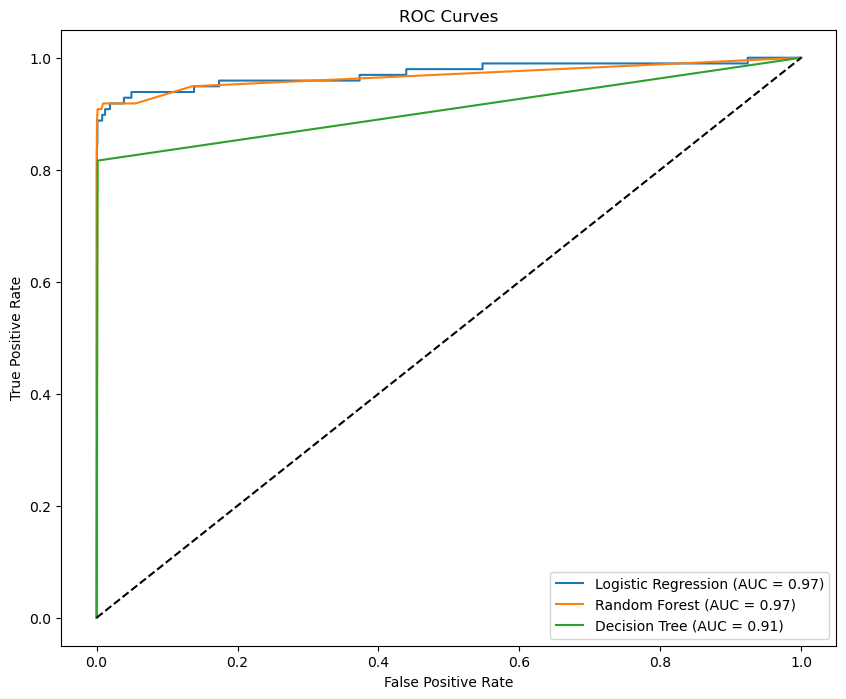

In [11]:
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

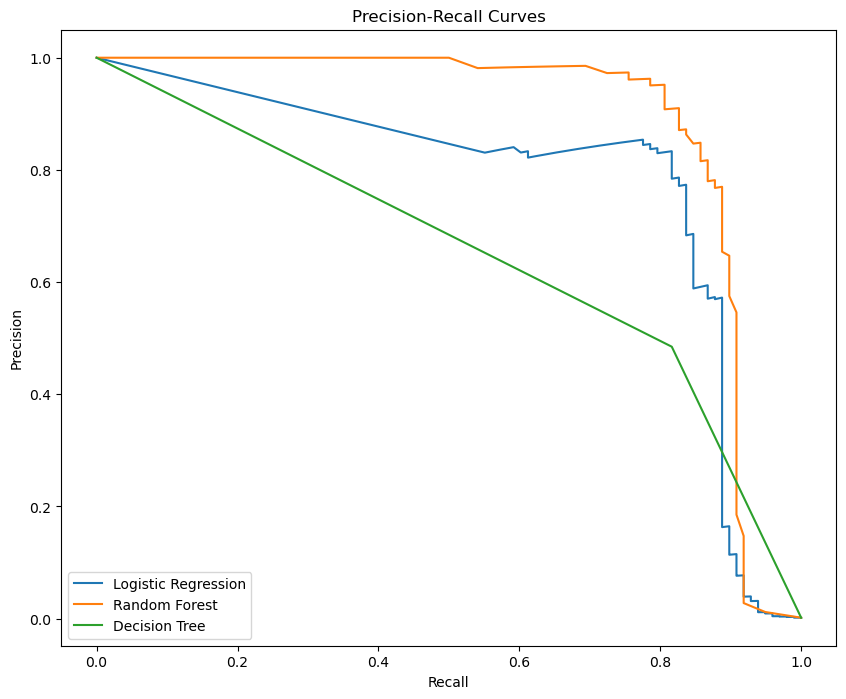

In [12]:
plt.figure(figsize=(10, 8))
for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['probabilities'])
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

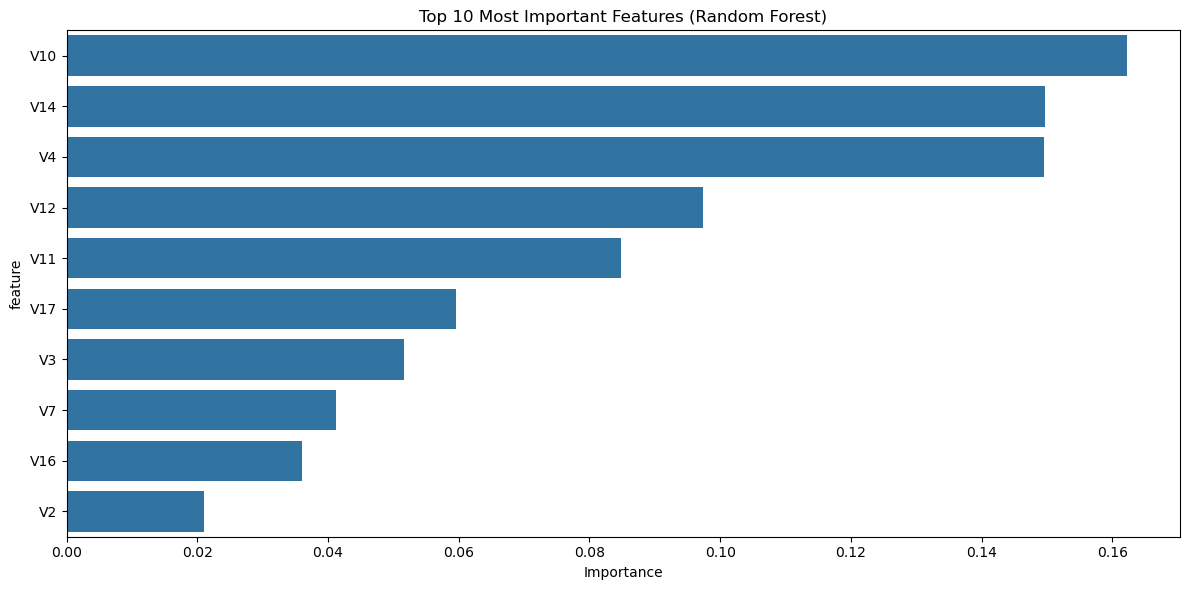

In [13]:
rf_importances = pd.DataFrame({'feature': X.columns,
    'importance': models['Random Forest'].named_steps['classifier'].feature_importances_})
rf_importances = rf_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=rf_importances.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

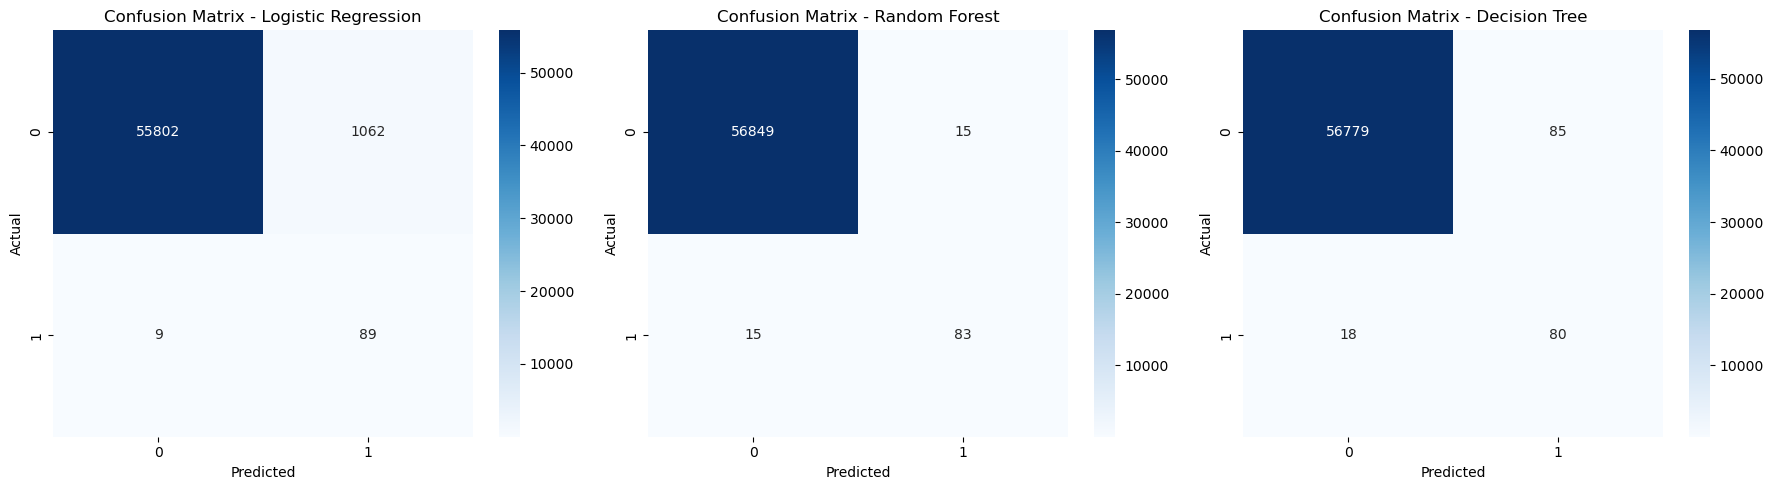

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

In [15]:
print("\nCross-validation Results:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(f"\n{name}:")
    print(f"Mean F1 Score: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-validation Results:

Logistic Regression:
Mean F1 Score: 0.6988
Standard Deviation: 0.0754

Random Forest:
Mean F1 Score: 0.8153
Standard Deviation: 0.0579

Decision Tree:
Mean F1 Score: 0.6247
Standard Deviation: 0.1147


In [ ]:
best_model_name = max(results.items(), key=lambda x: float(x[1]['classification_report'].split('\n')[3].split()[-2]))[0]
best_predictions = results[best_model_name]['predictions']

fp_mask = (y_test == 0) & (best_predictions == 1)
fn_mask = (y_test == 1) & (best_predictions == 0)

plt.figure(figsize=(12, 6))
plt.hist(X_test[fp_mask]['Amount'], alpha=0.5, label='False Positives', bins=50)
plt.hist(X_test[fn_mask]['Amount'], alpha=0.5, label='False Negatives', bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.title(f'Distribution of Misclassified Transactions ({best_model_name})')
plt.legend()
plt.show()